<a href="https://colab.research.google.com/github/YYEg/MAD/blob/main/LEVIN_MAD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import six
from sklearn.datasets import make_blobs
from sklearn.tree import ExtraTreeRegressor
from sklearn import tree
import graphviz

In [3]:
N = 3
D = 5


# Создание выборки с заданной дисперсией
X, y = make_blobs(n_samples=100, centers=N, n_features=D, random_state=1, cluster_std=5 ** 0.5)

# Разделение данных на разные выборки: обучающую и тестовую выборки:
# test_size=0.5 значит, что половина выборки уйдет на обучающую а вторая половина пойдет на тестовую.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#Новый датафрейм
df = pd.DataFrame(X_train)

# df['Class'] = y_train добавляет столбец Class в DataFrame.
df['Class'] = y_train

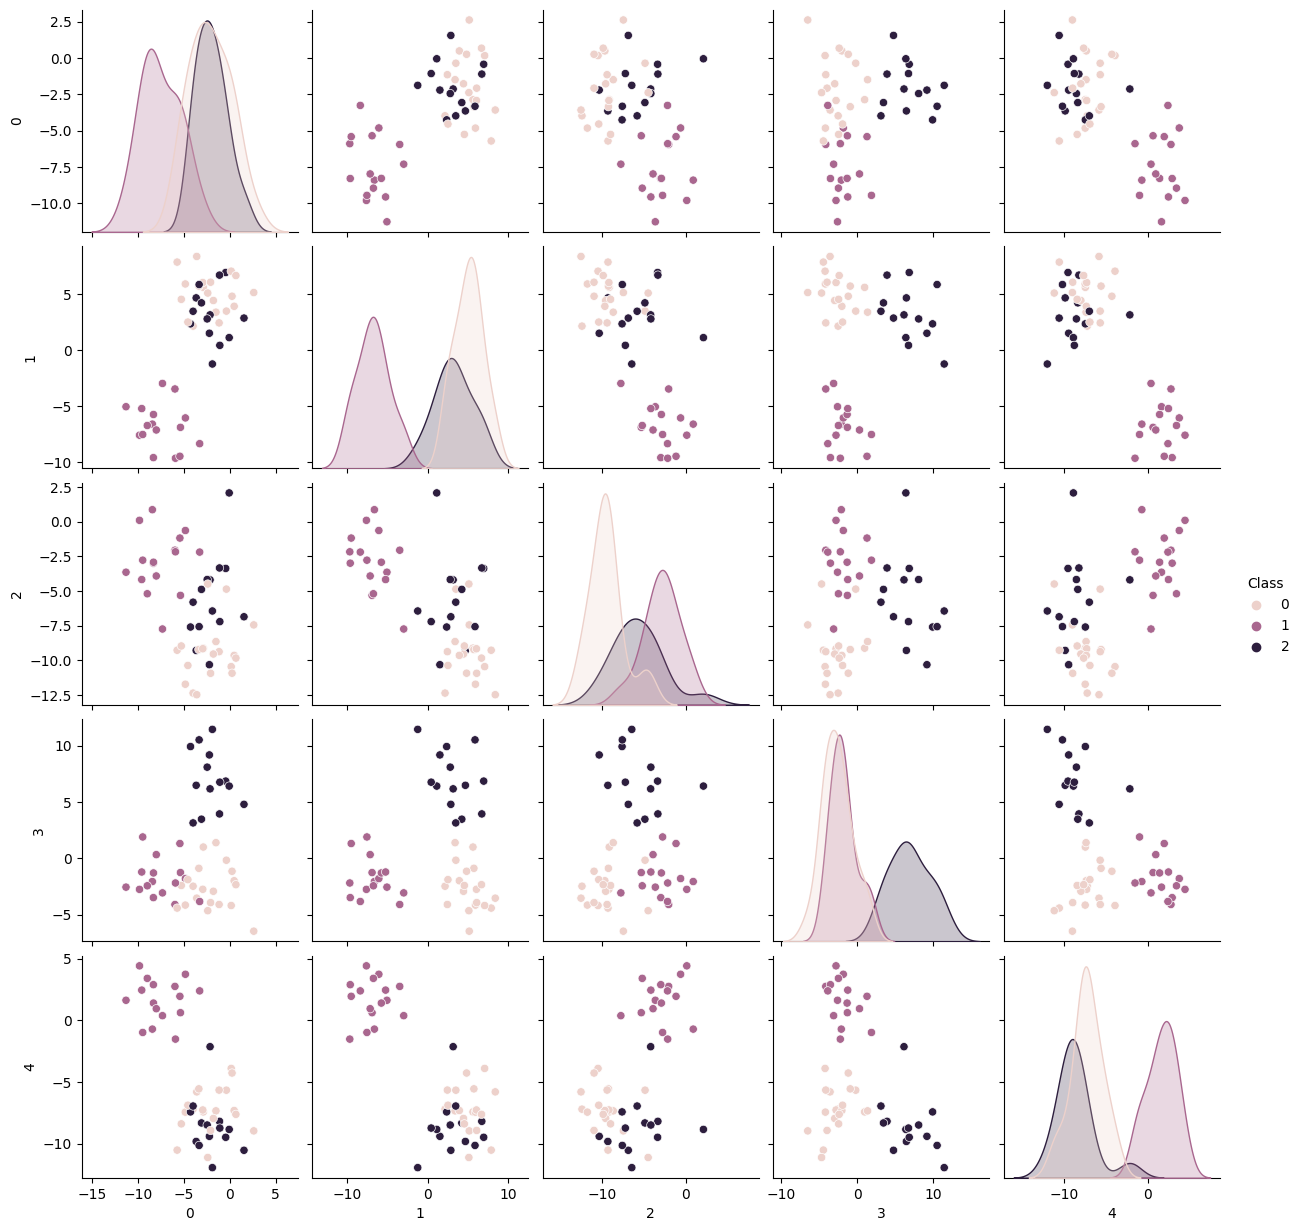

In [4]:
#диаграмма разброса на тестовых данных
sns.pairplot(df, hue='Class')

In [5]:
# создает объект модели классификатора дерева решений с определенными параметрами:
model = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)
#  обчучаем модель на тестовых X данных и y метках классов. Модель изучает сходности между данными и метками классов
#  и по полученной информации предсказывает классы для незивестных данных
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

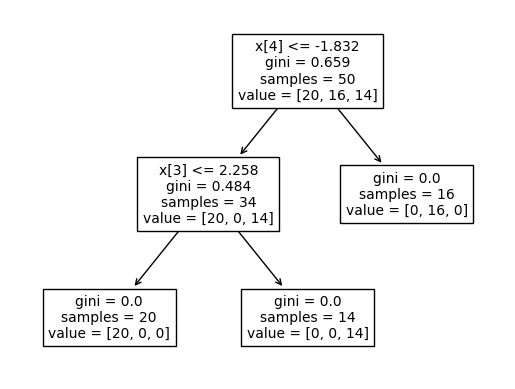

In [6]:
tree.plot_tree(model, fontsize=10)
plt.show()

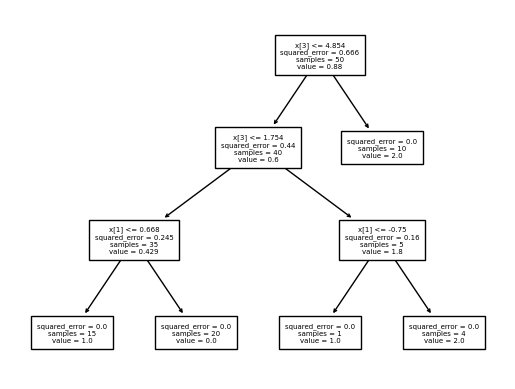

In [7]:
# Create the regressor
regressor = ExtraTreeRegressor(max_depth=5)

# Fit the model
regressor.fit(X_train, y_train)
tree.plot_tree(regressor, fontsize=5)
plt.show()


In [8]:
def DT(field1, field2, k): #процедура рисования "решающих поверхностей"
  splot=plt.subplot(D,D,k)
  x=df[[field1, field2]].values #определим данные
  df['Class']=y_train #определим результирующий признак
  model_pair=tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)
  model_pair.fit(x,y_train)
   		 #определим минимальные и максимальные значения в данных для большей информативности диаграмм
  min1, max1 = df[field1].min()-1, df[field1].max()+1
  min2, max2 = df[field2].min()-1, df[field2].max()+1
    		#определим все строки и столбцы области отрисовки
  X = np.linspace(min1, max1, 200)
  Y = np.linspace(min2, max2, 200)
  X, Y = np.meshgrid(X, Y)
    		# #определим значения "решающих поверхностей"
  ZZ = np.array([model_pair.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
  Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    		#отрисуем поверхности и данные
  plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    		#Выведем значения
  plt.scatter(df[field1],df[field2],c=y_train)
    		#оценка точности модели
  plt.title(model_pair.score(x,y_train))
  return splot


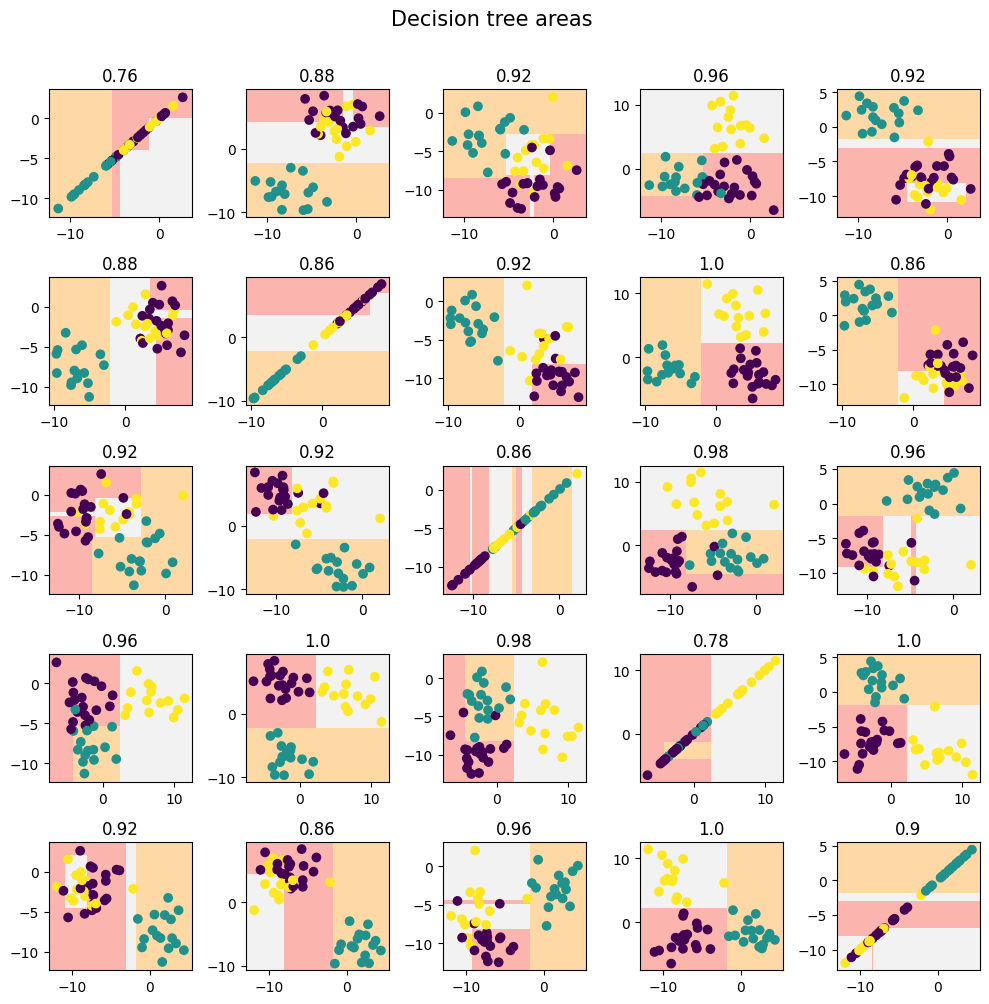

In [9]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Decision tree areas ',y=1, fontsize=15)
k=0
for i in range(D):
  for j in range (D):
    k=k+1
    splot=DT(i, j, k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [10]:
model.score(X_test,y_test)

0.98

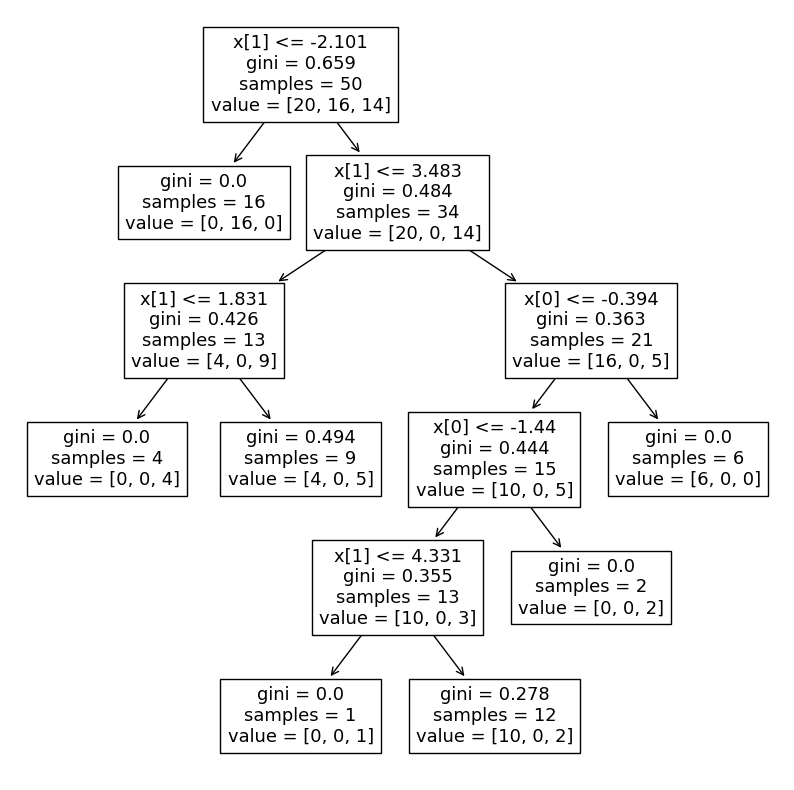

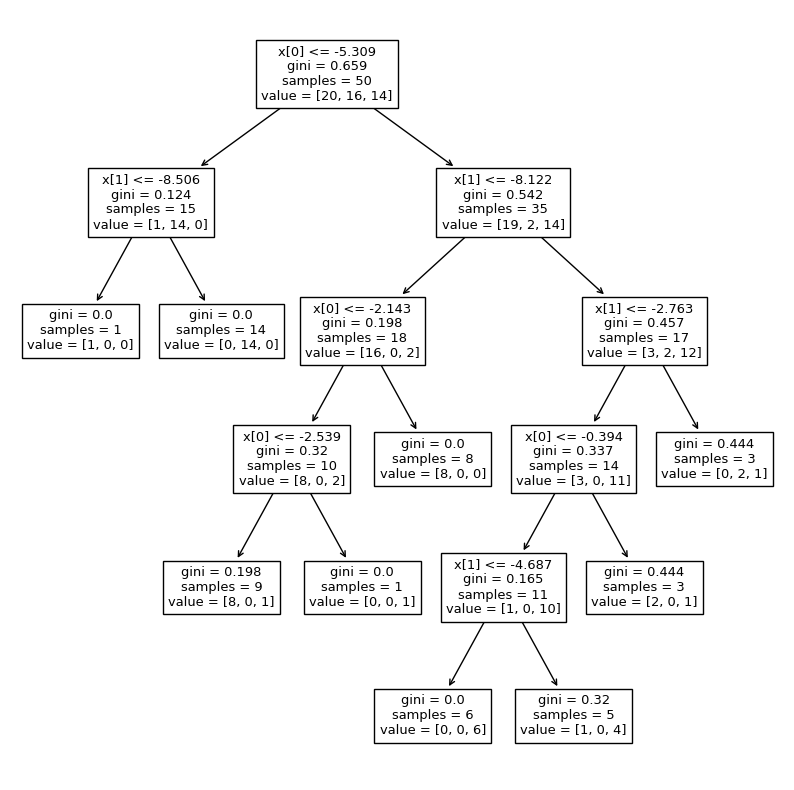

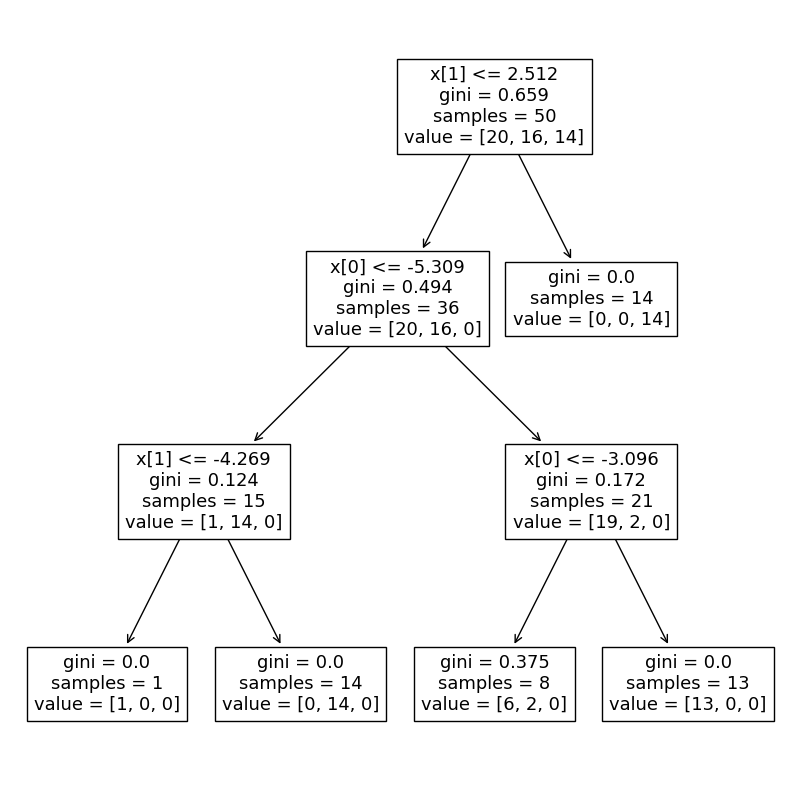

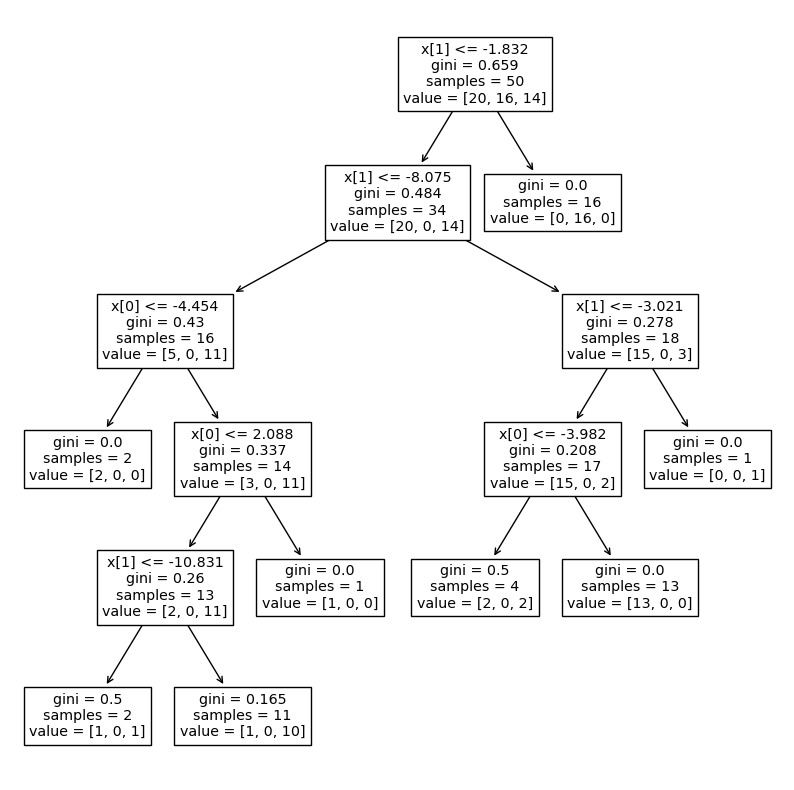

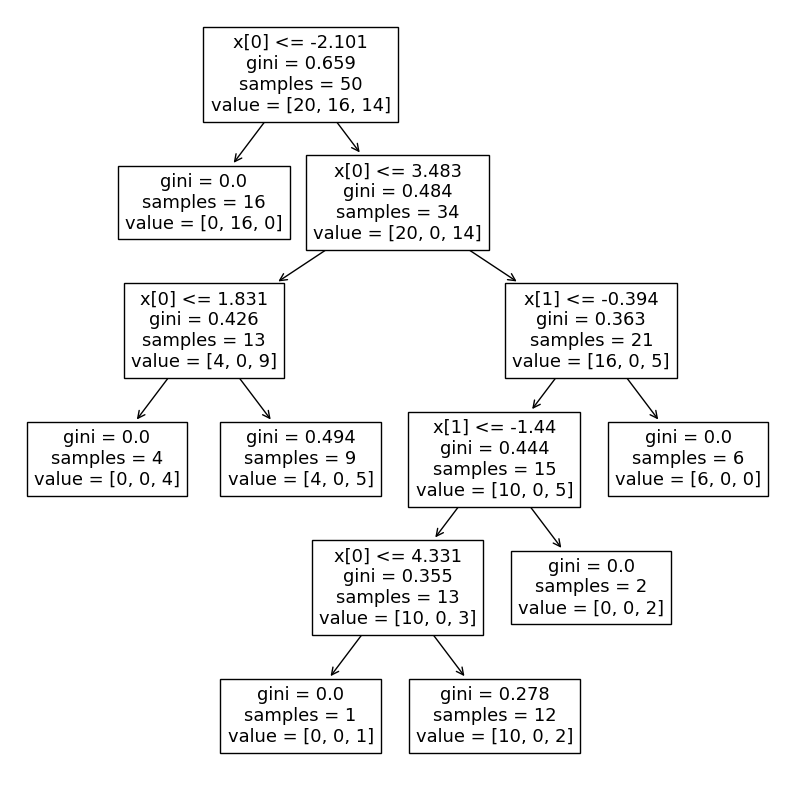

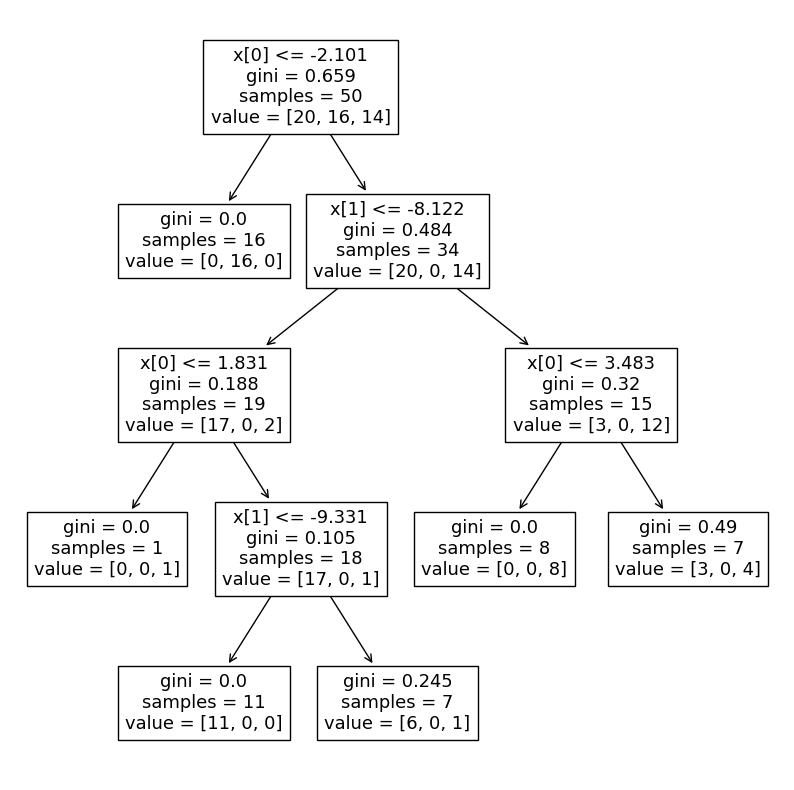

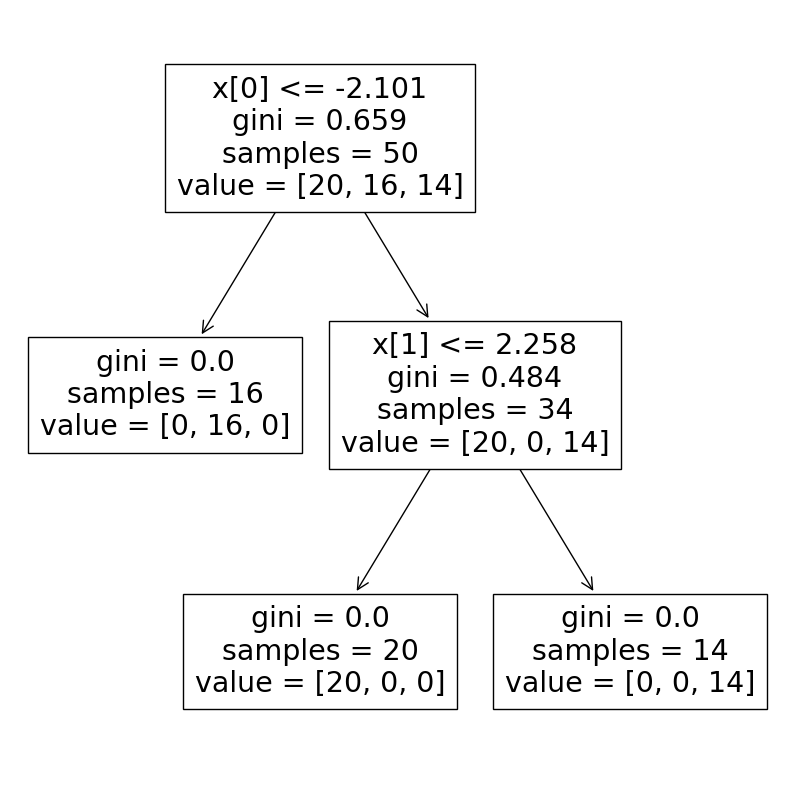

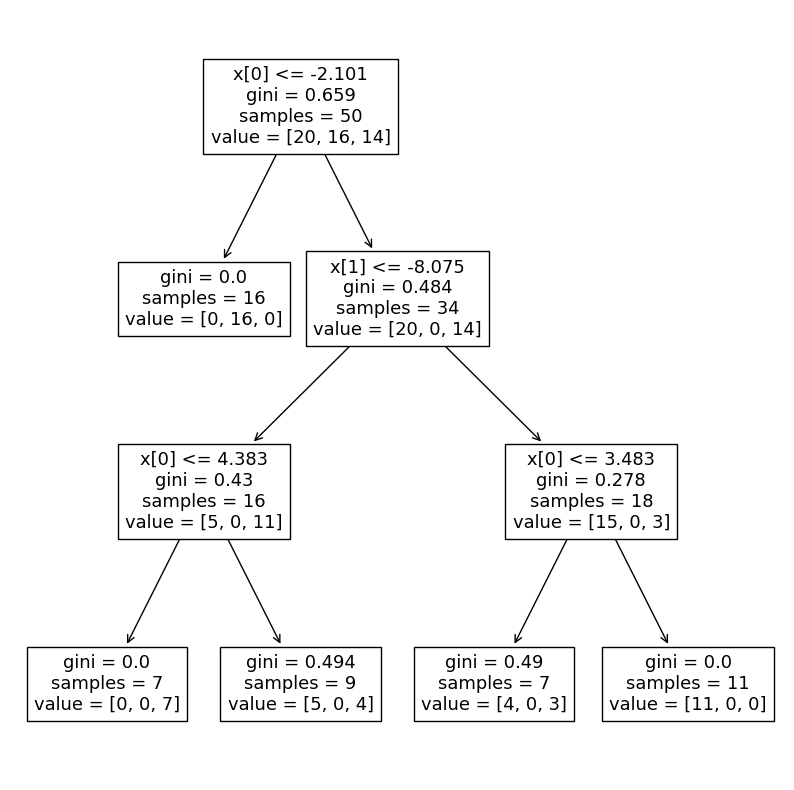

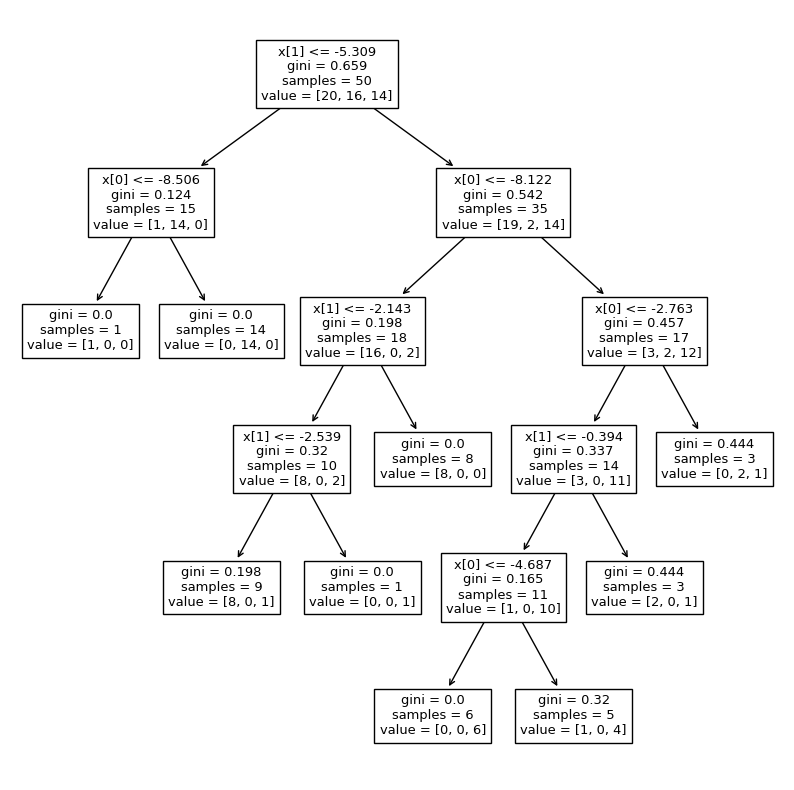

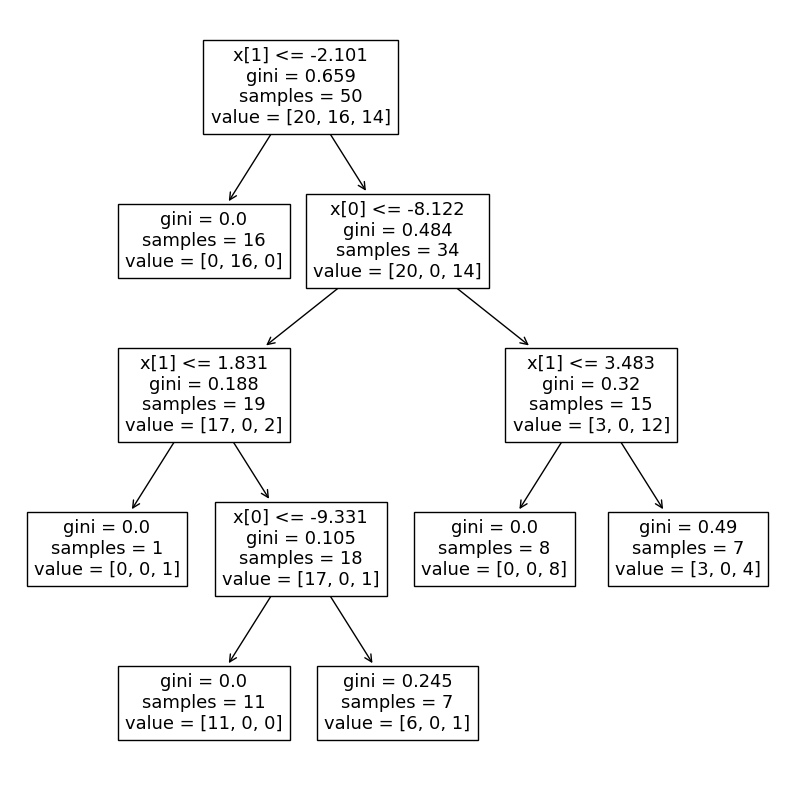

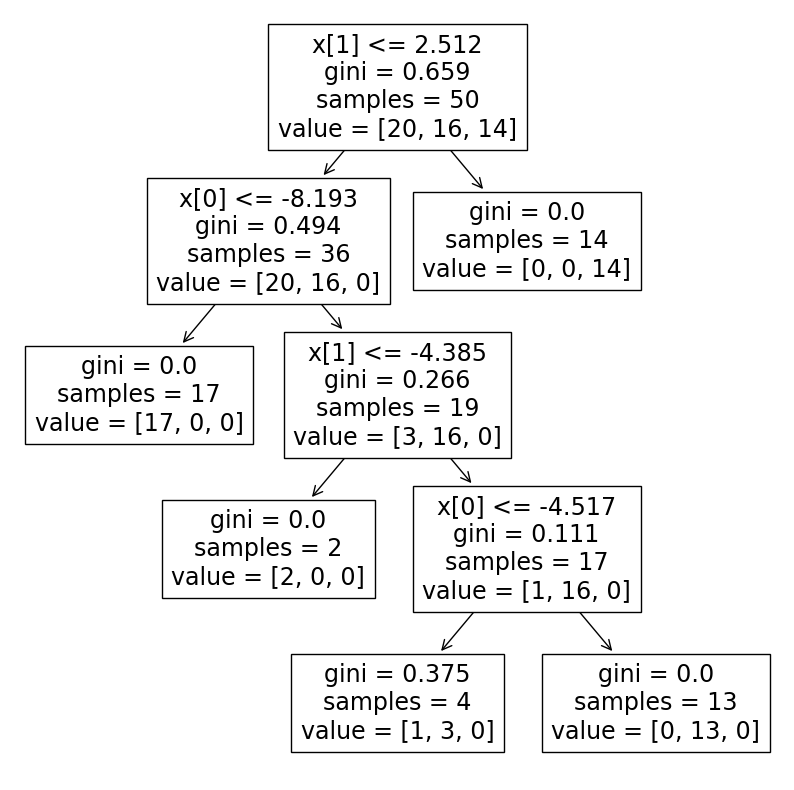

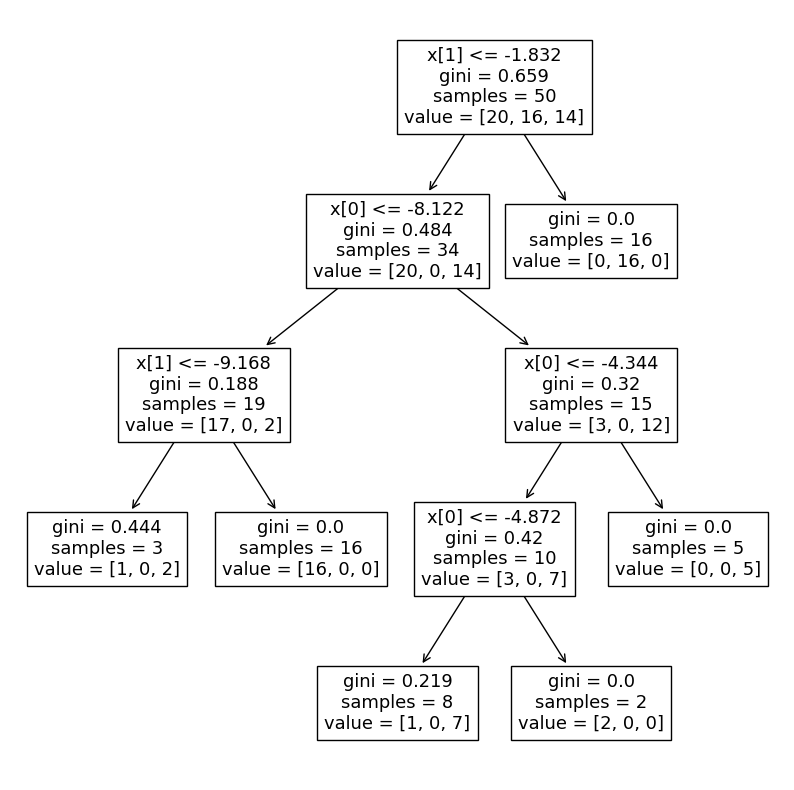

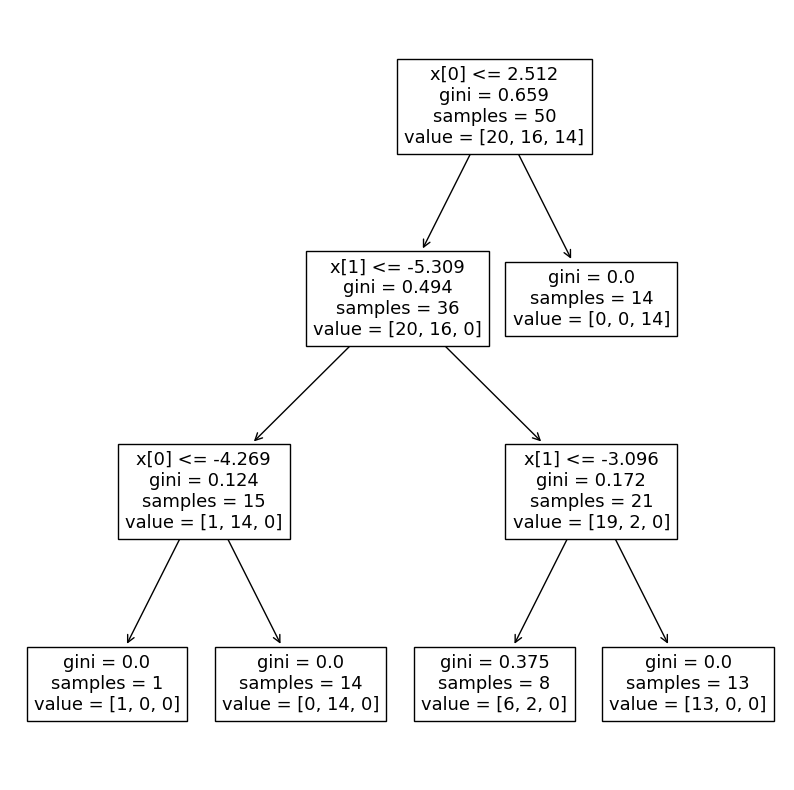

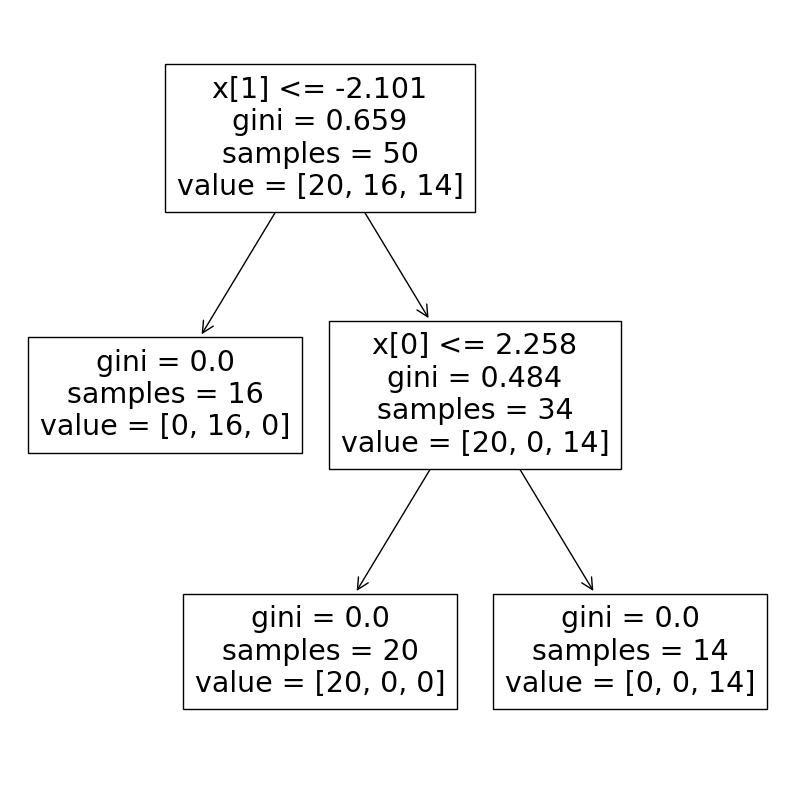

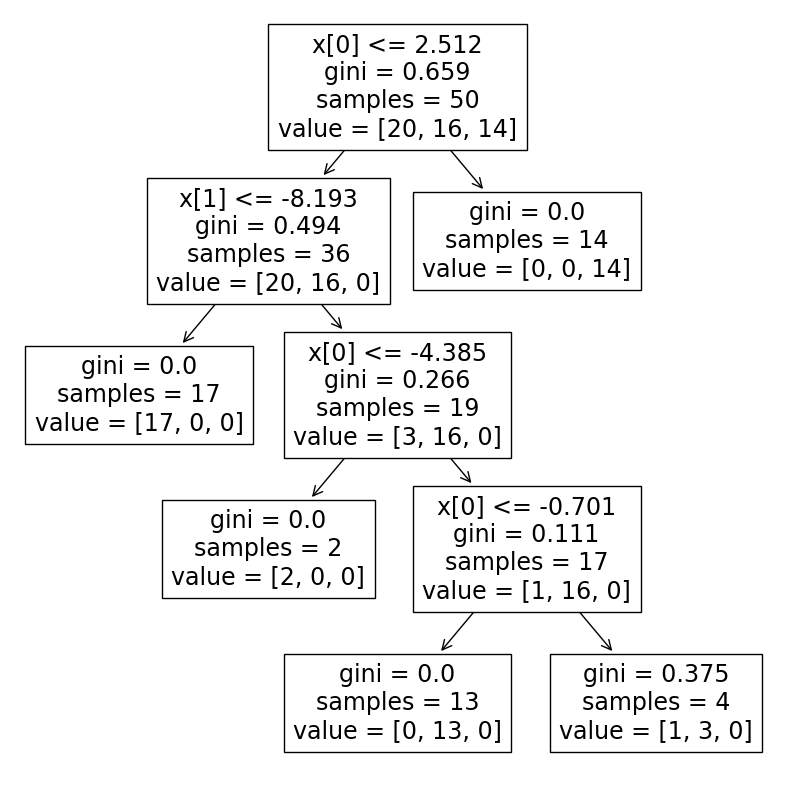

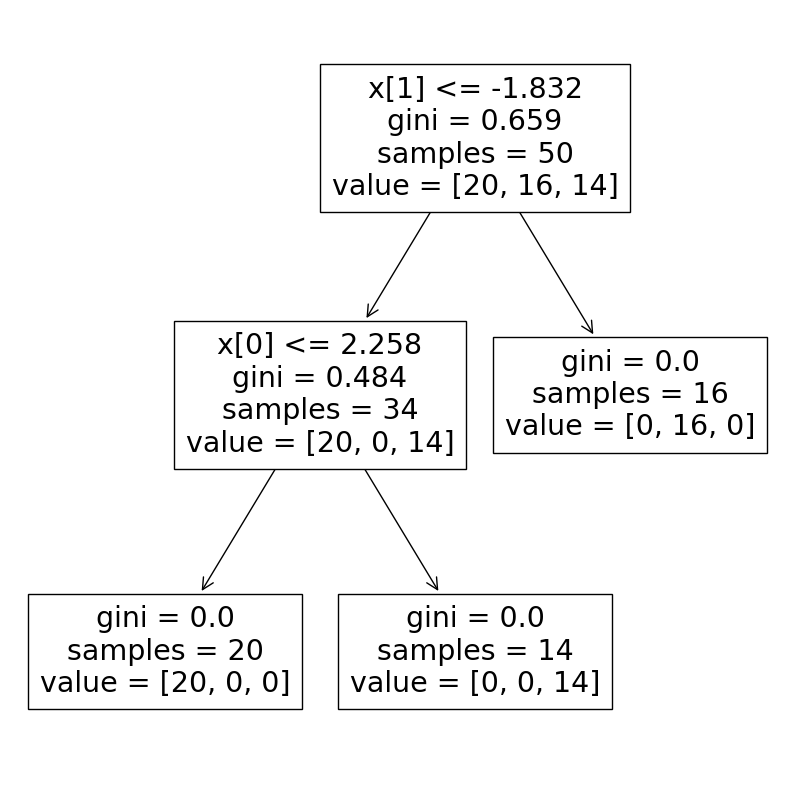

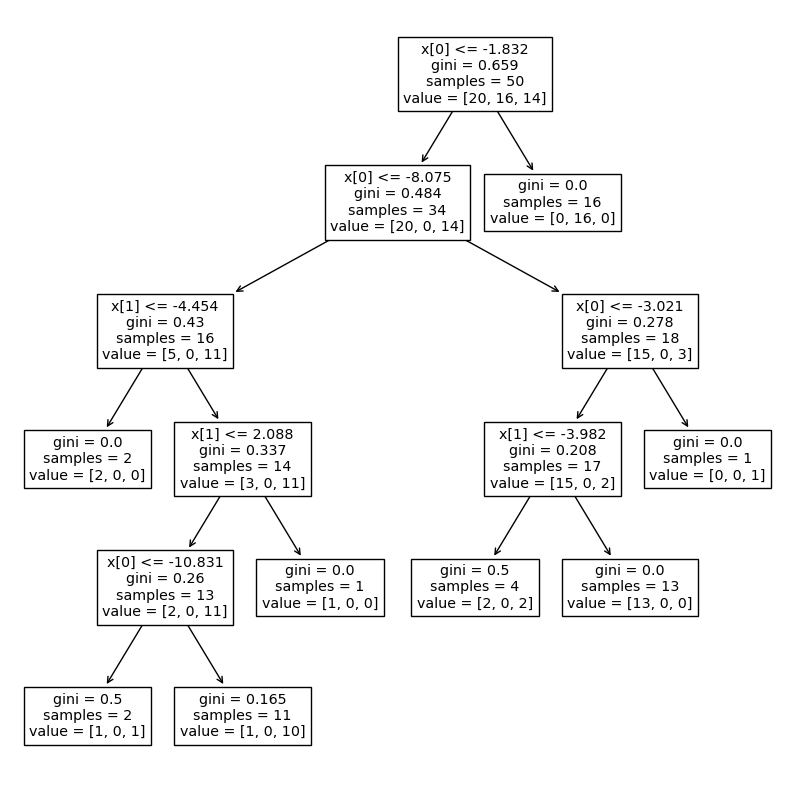

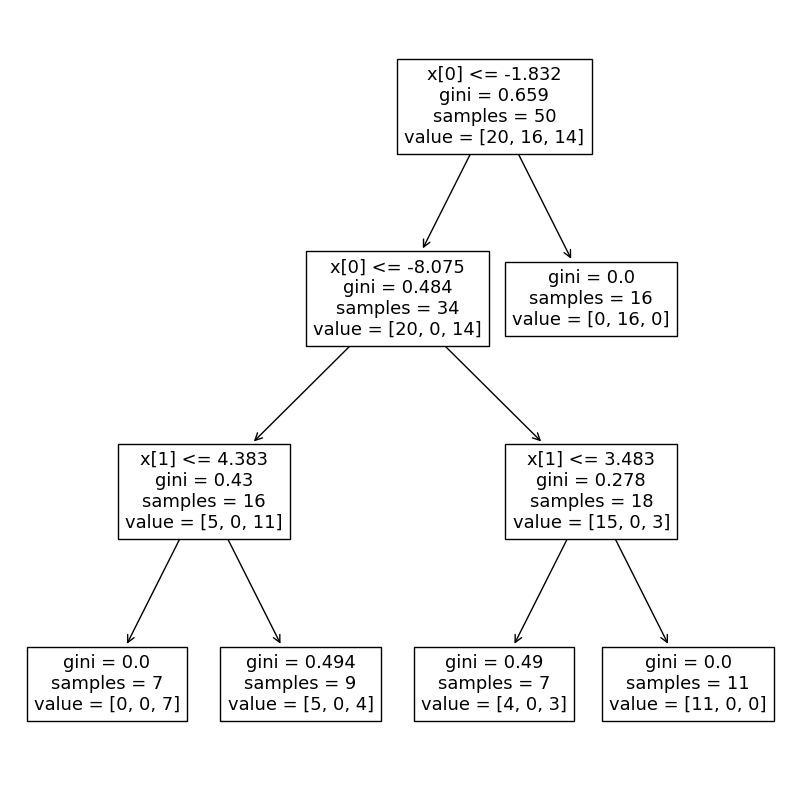

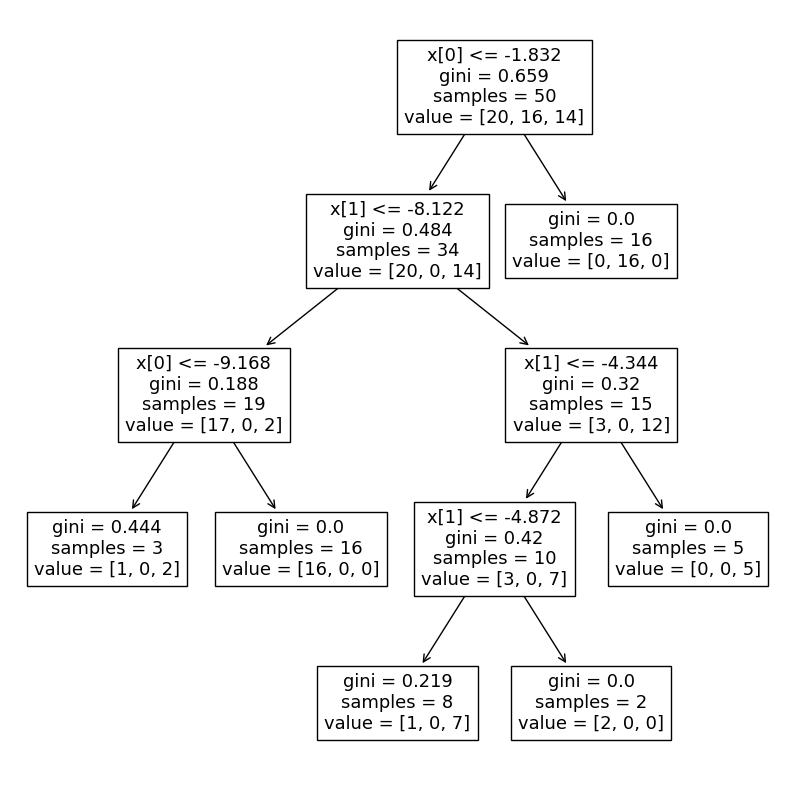

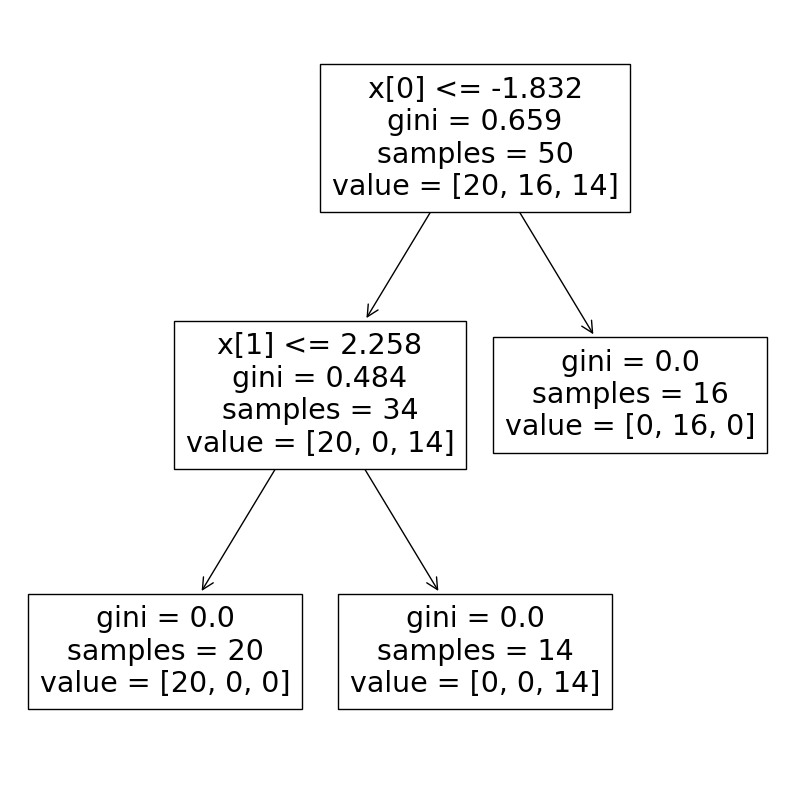

In [11]:
# Извлечение значений признаков из DataFrame

for i in range(D):
  for j in range (D):
      if (i == j):
        continue
      x = df[[i, j]].values

      # Добавление столбца "Class" с целевыми метками в DataFrame
      df['Class'] = y_train

      # Создание и обучение модели дерева решений
      model_pair = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)
      model_pair.fit(x, y_train)

      # Визуализация дерева решений
      plt.figure(figsize=(10,10))
      tree.plot_tree(model_pair)
      plt.show()